<a href="https://colab.research.google.com/github/amora201/Food-Image-Classification-Capstone/blob/main/Food_Model_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Extract Dataset from kaggle**

In [ ]:
!chmod 600 /content/kaggle.json

In [ ]:
!KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d trolukovich/food11-image-dataset

100% 1.08G/1.08G [00:04<00:00, 374MB/s]
100% 1.08G/1.08G [00:04<00:00, 285MB/s]


In [ ]:
import zipfile

foodfile = zipfile.ZipFile('/content/food11-image-dataset.zip', 'r')
foodfile.extractall('/tmp/')

In [ ]:
!pip install pyyaml h5py
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from google.colab import files
import os
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pathlib
print(tf.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2.8.2


In [ ]:
!rm -rf '/tmp/training/Dessert'
!rm -rf '/tmp/validation/Dessert' 
!rm -rf '/tmp/evaluation/Dessert'

In [ ]:
#TRAINING
train_dir = '/tmp/training'

train_bread_dir = os.path.join(train_dir, 'Bread')
train_dairy_dir = os.path.join(train_dir, 'Dairy product')
#train_dessert_dir = os.path.join(train_dir, 'Dessert')
train_egg_dir = os.path.join(train_dir, 'Egg')
train_fried_dir = os.path.join(train_dir, 'Fried food')
train_meat_dir = os.path.join(train_dir, 'Meat')
train_noodle_dir = os.path.join(train_dir, 'Noodles-Pasta')
train_rice_dir = os.path.join(train_dir, 'Rice')
train_seafood_dir = os.path.join(train_dir, 'Seafood')
train_soup_dir = os.path.join(train_dir, 'Soup')
train_vegetable_dir = os.path.join(train_dir, 'Vegetable-Fruit')

#VALIDATION
validation_dir = '/tmp/validation'

val_bread_dir = os.path.join(validation_dir, 'Bread')
val_dairy_dir = os.path.join(validation_dir, 'Dairy product')
#val_dessert_dir = os.path.join(validation_dir, 'Dessert')
val_egg_dir = os.path.join(validation_dir, 'Egg')
val_fried_dir = os.path.join(validation_dir, 'Fried food')
val_meat_dir = os.path.join(validation_dir, 'Meat')
val_noodle_dir = os.path.join(validation_dir, 'Noodles-Pasta')
val_rice_dir = os.path.join(validation_dir, 'Rice')
val_seafood_dir = os.path.join(validation_dir, 'Seafood')
val_soup_dir = os.path.join(validation_dir, 'Soup')
val_vegetable_dir = os.path.join(validation_dir, 'Vegetable-Fruit')

test_dir = '/tmp/evaluation'

In [ ]:
#TRAIN_SET
train_bread = os.listdir(train_bread_dir)
print("TRAIN SET BREAD: ", train_bread)

train_dairy = os.listdir(train_dairy_dir)
print("TRAIN SET DAIRY: ",train_dairy)

# train_dessert = os.listdir(train_dessert_dir)
# print("TRAIN SET DESSERT: ",train_dessert)

train_egg = os.listdir(train_egg_dir)
print("TRAIN SET EGG: ",train_egg)   

train_fried = os.listdir(train_fried_dir)
print("TRAIN SET FRIED: ",train_fried)

train_meat = os.listdir(train_meat_dir)
print("TRAIN SET MEAT: ",train_meat)

train_noodle = os.listdir(train_noodle_dir)
print("TRAIN SET PASTA: ",train_noodle)

train_rice = os.listdir(train_rice_dir)
print("TRAIN SET RICE: ",train_rice)

train_seafood = os.listdir(train_seafood_dir)
print("TRAIN SET SEAFOOD: ",train_seafood)

train_soup = os.listdir(train_soup_dir)
print("TRAIN SET SOUP: ",train_soup)

train_vegetable = os.listdir(train_vegetable_dir)
print("TRAIN SET VEGETABLE: ",train_vegetable)

#VAL_SET
val_bread = os.listdir(val_bread_dir)
print("VALIDATION SET BREAD: ",val_bread)

val_dairy = os.listdir(val_dairy_dir)
print("VALIDATION SET DAIRY: ",val_dairy)

# val_dessert = os.listdir(val_dessert_dir)
# print("VALIDATION SET DESSERT: ",val_dessert)

val_egg = os.listdir(val_egg_dir)
print("VALIDATION SET EGG: ",val_egg)

val_fried = os.listdir(val_fried_dir)
print("VALIDATION SET FRIED: ",val_fried)

val_meat = os.listdir(val_meat_dir)
print("VALIDATION SET MEAT: ",val_meat)

val_noodle = os.listdir(val_noodle_dir)
print("VALIDATION SET PASTA: ",val_noodle)

val_rice = os.listdir(val_rice_dir)
print("VALIDATION SET RICE: ",val_rice)

val_seafood = os.listdir(val_seafood_dir)
print("VALIDATION SET SEAFOOD: ",val_seafood)

val_soup = os.listdir(val_soup_dir)
print("VALIDATION SET SOUP: ",val_soup)

val_vegetable = os.listdir(val_vegetable_dir)
print("VALIDATION SET VEGETABLE: ",val_vegetable)

TRAIN SET BREAD:  ['681.jpg', '764.jpg', '599.jpg', '407.jpg', '606.jpg', '984.jpg', '178.jpg', '794.jpg', '418.jpg', '588.jpg', '434.jpg', '895.jpg', '49.jpg', '295.jpg', '33.jpg', '562.jpg', '158.jpg', '919.jpg', '89.jpg', '612.jpg', '179.jpg', '209.jpg', '642.jpg', '783.jpg', '633.jpg', '494.jpg', '857.jpg', '644.jpg', '29.jpg', '799.jpg', '875.jpg', '693.jpg', '10.jpg', '528.jpg', '564.jpg', '515.jpg', '468.jpg', '593.jpg', '224.jpg', '415.jpg', '851.jpg', '765.jpg', '569.jpg', '972.jpg', '12.jpg', '461.jpg', '102.jpg', '632.jpg', '721.jpg', '118.jpg', '425.jpg', '194.jpg', '313.jpg', '262.jpg', '566.jpg', '610.jpg', '215.jpg', '581.jpg', '25.jpg', '109.jpg', '386.jpg', '741.jpg', '590.jpg', '370.jpg', '47.jpg', '967.jpg', '341.jpg', '878.jpg', '327.jpg', '328.jpg', '91.jpg', '17.jpg', '582.jpg', '334.jpg', '136.jpg', '28.jpg', '402.jpg', '549.jpg', '488.jpg', '101.jpg', '357.jpg', '466.jpg', '694.jpg', '757.jpg', '509.jpg', '666.jpg', '240.jpg', '521.jpg', '767.jpg', '833.jpg', '7

In [ ]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 5
ncols = 5

# Index for iterating over images
pic_index = 0

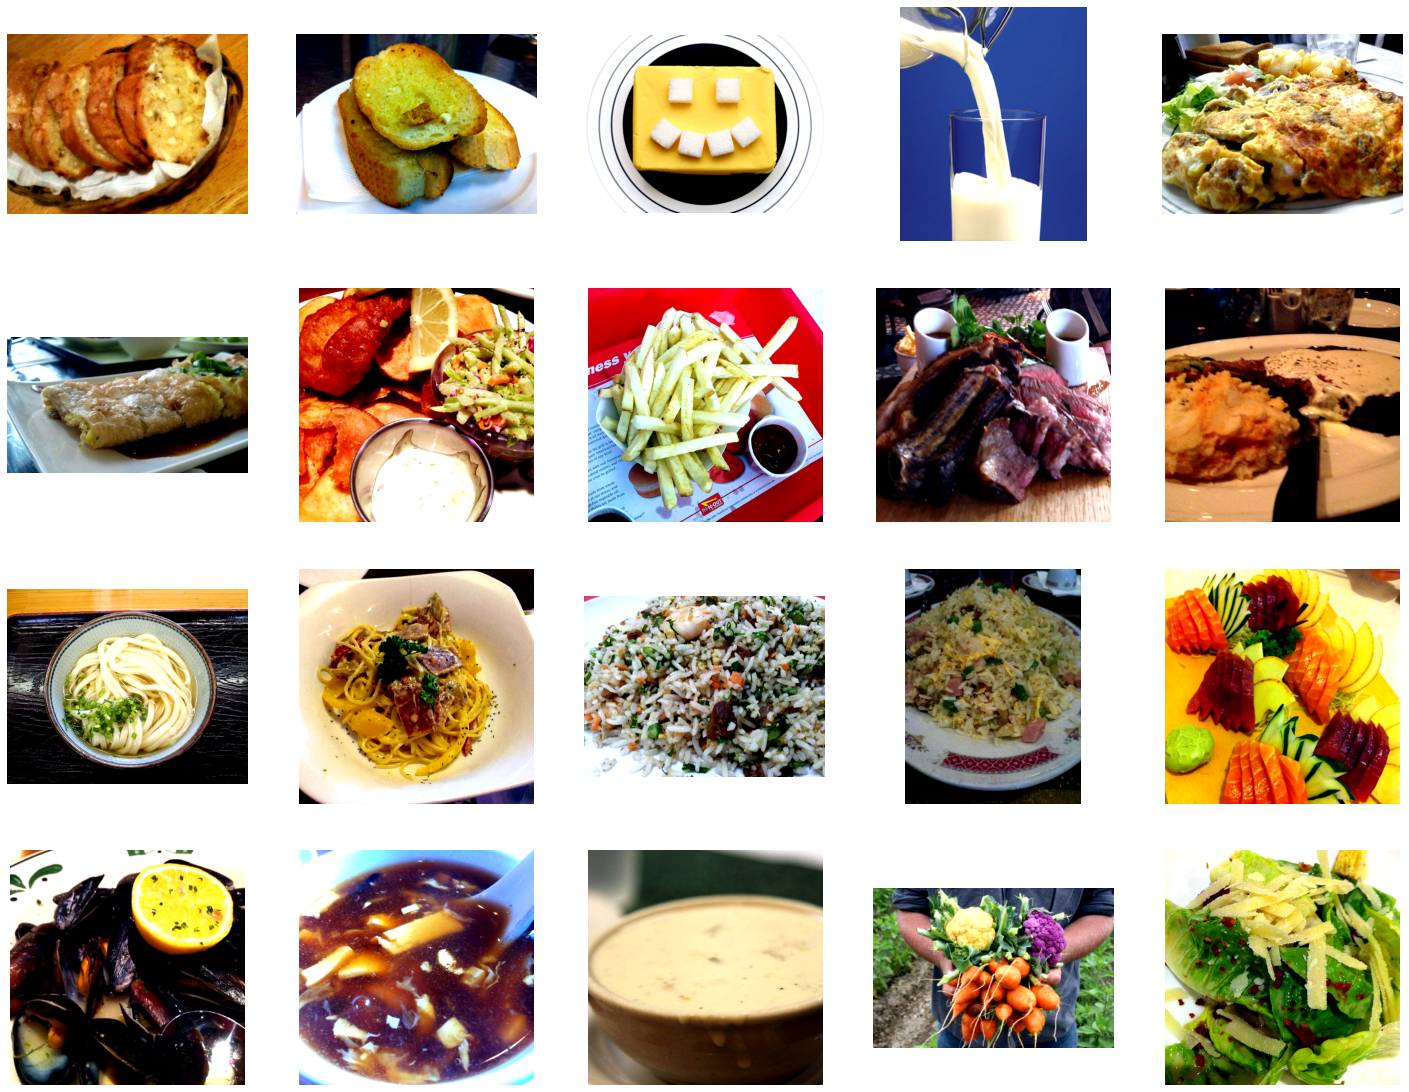

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 5)

pic_index += 2
next_bread = [os.path.join(train_bread_dir, fname) 
                for fname in train_bread[pic_index-2:pic_index]]
next_dairy = [os.path.join(train_dairy_dir, fname) 
                for fname in train_dairy[pic_index-2:pic_index]]
# next_dessert = [os.path.join(train_dessert_dir, fname) 
#                 for fname in train_dessert[pic_index-2:pic_index]]
next_egg = [os.path.join(train_egg_dir, fname) 
                for fname in train_egg[pic_index-2:pic_index]]
next_fried = [os.path.join(train_fried_dir, fname) 
                for fname in train_fried[pic_index-2:pic_index]]
next_meat = [os.path.join(train_meat_dir, fname) 
                for fname in train_meat[pic_index-2:pic_index]]
next_noodle = [os.path.join(train_noodle_dir, fname) 
                for fname in train_noodle[pic_index-2:pic_index]]
next_rice = [os.path.join(train_rice_dir, fname) 
                for fname in train_rice[pic_index-2:pic_index]]
next_seafood = [os.path.join(train_seafood_dir, fname) 
                for fname in train_seafood[pic_index-2:pic_index]]
next_soup = [os.path.join(train_soup_dir, fname) 
                for fname in train_soup[pic_index-2:pic_index]]
next_vegetable = [os.path.join(train_vegetable_dir, fname) 
                for fname in train_vegetable[pic_index-2:pic_index]]

for i, img_path in enumerate(next_bread + next_dairy + next_egg + next_fried + 
                             next_meat + next_noodle + next_rice + next_seafood + next_soup + next_vegetable):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  
  #Change contrast
  tfimg = tf.image.adjust_contrast(img, 1.5)
  plt.imshow(tfimg)

plt.show()


# **Making the Model Image Classification**

In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape = (224, 224, 3)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(11, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 128)      0         
 2D)                                                    

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        batch_size=64,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        batch_size=64,
        class_mode='categorical')

Found 8366 images belonging to 10 classes.
Found 2930 images belonging to 10 classes.


In [ ]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > 0.7):
          self.model.stop_training = True

EPOCHS = 10
# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=9866/64, 
      epochs=EPOCHS,
      verbose=2,
      validation_data = validation_generator,
      validation_steps=3430/64,
      callbacks = MyCallback())

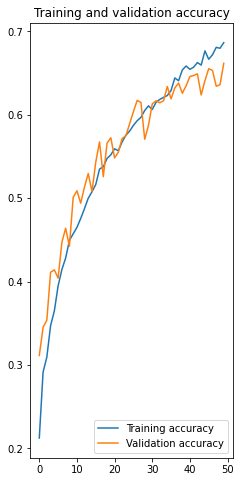

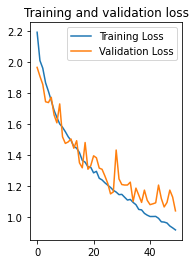

In [ ]:
def plot_loss_acc(history):
  
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs, acc, label='Training accuracy')
  plt.plot(epochs, val_acc, label='Validation accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and validation accuracy')

  plt.figure()
  plt.subplot(1, 2, 2)
  plt.plot(epochs, loss, label='Training Loss')
  plt.plot(epochs, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and validation loss')
 
  plt.show()
# Plot training results
plot_loss_acc(history)

In [ ]:
model.evaluate(validation_generator)

54/54 [==============================] - 20s 360ms/step - loss: 0.8759 - accuracy: 0.7152


[0.8758576512336731, 0.7151603698730469]

# **Save and Load Model and Weights**

In [ ]:
model.save_weights("my_checkpoint")

In [ ]:
model.load_weights('my_checkpoint')

loss, acc = model.evaluate(validation_generator, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

54/54 - 21s - loss: 0.9561 - accuracy: 0.7015 - 21s/epoch - 383ms/step
Restored model, accuracy: 70.15%


In [ ]:
model.save('my_model.h5')

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_model_re.h5')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 128)      0         
 2D)                                                    

In [ ]:
loss, acc = new_model.evaluate(validation_generator, verbose=2)
print('Restored model, validation accuracy: {:5.2f}%'.format(100 * acc))

54/54 - 19s - loss: 0.9603 - accuracy: 0.7052 - 19s/epoch - 358ms/step
Restored model, validation accuracy: 70.52%


In [ ]:
export_model_dir = 'food_saved_model'
tf.saved_model.save(model, export_model_dir)

INFO:tensorflow:Assets written to: food_saved_model/assets


# **Transfer** **Learning**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

tl_model = VGG16(input_shape=(224, 224, 3),
                     include_top=False,
                     weights='imagenet')

for layer in tl_model.layers:
  layer.trainable = False

tl_model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
batch_size = 40
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512))
    labels = np.zeros(shape=(sample_count, 10))

    generator = ImageDataGenerator(rescale=1./255).flow_from_directory(directory, 
    target_size=(224, 224), batch_size = batch_size, 
    class_mode='categorical')

    i = 0

    for inputs_batch, labels_batch in generator:
        features_batch = tl_model.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        print(i);

        if (i * batch_size) >= sample_count:
            break

    return features, labels

In [ ]:
train_features, train_labels = extract_features(train_dir, 8366)
validation_features, validation_labels = extract_features(validation_dir,2930)
test_features, test_labels = extract_features(test_dir, 2847)

train_features = np.reshape(train_features, (8366, 7 * 7 * 512))
validation_features = np.reshape(validation_features, (2930, 7 * 7 * 512))
test_features = np.reshape(test_features, (2847, 7 * 7 * 512))

Found 8366 images belonging to 10 classes.
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
Found 2930 images belonging to 10 classes.
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(7 * 7 * 512,)),
    tf.keras.layers.Dense(10, activation='softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 12,850,698
Trainable params: 12,850,698
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
EPOCHS = 25

history = model.fit(train_features, train_labels,
                    epochs = EPOCHS, 
                    batch_size = 64,
                    validation_data = (validation_features, validation_labels))

Epoch 1/25
131/131 [==============================] - 3s 13ms/step - loss: 1.1656 - accuracy: 0.6015 - val_loss: 0.8889 - val_accuracy: 0.7020
Epoch 2/25
131/131 [==============================] - 1s 10ms/step - loss: 0.6068 - accuracy: 0.8024 - val_loss: 0.8422 - val_accuracy: 0.7218
Epoch 3/25
131/131 [==============================] - 1s 10ms/step - loss: 0.3859 - accuracy: 0.8880 - val_loss: 0.8210 - val_accuracy: 0.7249
Epoch 4/25
131/131 [==============================] - 1s 10ms/step - loss: 0.2579 - accuracy: 0.9386 - val_loss: 0.7831 - val_accuracy: 0.7471
Epoch 5/25
131/131 [==============================] - 1s 10ms/step - loss: 0.1682 - accuracy: 0.9747 - val_loss: 0.8270 - val_accuracy: 0.7369
Epoch 6/25
131/131 [==============================] - 1s 9ms/step - loss: 0.1171 - accuracy: 0.9882 - val_loss: 0.8156 - val_accuracy: 0.7420
Epoch 7/25
131/131 [==============================] - 1s 9ms/step - loss: 0.0785 - accuracy: 0.9965 - val_loss: 0.8070 - val_accuracy: 0.7451
E

In [ ]:
model = tf.keras.models.Sequential([ 
        tl_model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

tl_model.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               12845568  
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 27,565,386
Trainable params: 12,850,698
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
tl_model.trainable = True

set_trainable = False
for layer in tl_model.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        batch_size=64,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        batch_size=64,
        class_mode='categorical')

Found 8366 images belonging to 10 classes.
Found 2930 images belonging to 10 classes.


In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > 0.85 and logs.get('val_loss') < 0.55):
          self.model.stop_training = True

EPOCHS = 20

history = model.fit(
      train_generator,
      steps_per_epoch=8366/64,
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=2930/64,
      callbacks = MyCallback()
)

Epoch 1/20
130/130 [==============================] - 180s 1s/step - loss: 1.1438 - accuracy: 0.6118 - val_loss: 0.7590 - val_accuracy: 0.7522
Epoch 2/20
130/130 [==============================] - 165s 1s/step - loss: 0.7212 - accuracy: 0.7582 - val_loss: 0.6630 - val_accuracy: 0.8010
Epoch 3/20
130/130 [==============================] - 157s 1s/step - loss: 0.5802 - accuracy: 0.8028 - val_loss: 0.6474 - val_accuracy: 0.8085
Epoch 4/20
130/130 [==============================] - 161s 1s/step - loss: 0.4984 - accuracy: 0.8337 - val_loss: 0.5553 - val_accuracy: 0.8297
Epoch 5/20
130/130 [==============================] - 156s 1s/step - loss: 0.4455 - accuracy: 0.8526 - val_loss: 0.6184 - val_accuracy: 0.8184
Epoch 6/20
130/130 [==============================] - 156s 1s/step - loss: 0.3889 - accuracy: 0.8652 - val_loss: 0.6369 - val_accuracy: 0.8297
Epoch 7/20
130/130 [==============================] - 155s 1s/step - loss: 0.3620 - accuracy: 0.8728 - val_loss: 0.5391 - val_accuracy: 0.8413

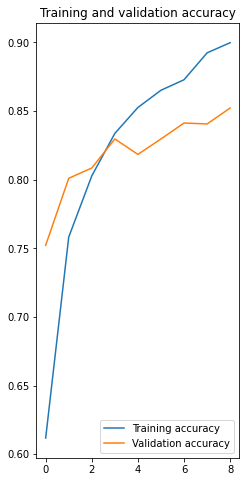

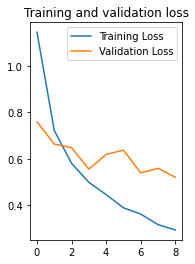

In [ ]:
def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs, acc, label='Training accuracy')
  plt.plot(epochs, val_acc, label='Validation accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and validation accuracy')

  plt.figure()
  plt.subplot(1, 2, 2)
  plt.plot(epochs, loss, label='Training Loss')
  plt.plot(epochs, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and validation loss')
 
  plt.show()
# Plot training results
plot_loss_acc(history)

In [ ]:
model.save('my_model2.h5')

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_model2.h5')

# Show the model architecture
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               12845568  
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 27,565,386
Trainable params: 19,930,122
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
loss, acc = new_model.evaluate(validation_generator, verbose=2)
print('Restored model, validation accuracy: {:5.2f}%'.format(100 * acc))

46/46 - 35s - loss: 0.5202 - accuracy: 0.8522 - 35s/epoch - 763ms/step
Restored model, validation accuracy: 85.22%


In [ ]:
model.save_weights("my_checkpoint2")

# **Convert to TensorFlow Lite**

In [ ]:
tflite_model = tf.keras.models.load_model('my_model2.h5')

loss, acc = tflite_model.evaluate(validation_generator, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

46/46 - 25s - loss: 0.5202 - accuracy: 0.8522 - 25s/epoch - 543ms/step
Restored model, accuracy: 85.22%


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(tflite_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.uint8]
convert_model = converter.convert()
open ('food-model-uint8-optimizer.tflite', 'wb').write(convert_model)

INFO:tensorflow:Assets written to: /tmp/tmpydreociu/assets


INFO:tensorflow:Assets written to: /tmp/tmpydreociu/assets


110270740

#**Prediction Test**


In [ ]:
test_loss, test_acc = model.evaluate_generator(test_generator)
print("Restored model, accuracy: {:5.2f}%".format(100 * test_acc))
print("Restored model, loss: {:5.2f}%".format(test_loss))

In [ ]:
model.load_weights('my_checkpoint2')

loss, acc = model.evaluate(validation_generator, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

In [ ]:
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=64)
  print(fn)
  print(classes[0])


Saving 0.jpg to 0 (3).jpg
Saving 1.jpg to 1 (3).jpg
Saving 2.jpg to 2 (3).jpg
Saving 3.jpg to 3 (3).jpg
Saving 4.jpg to 4 (3).jpg
Saving 5.jpg to 5 (3).jpg
Saving 6.jpg to 6 (3).jpg
Saving 7.jpg to 7 (5).jpg
0.jpg
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
1.jpg
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2.jpg
[1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.6075096e-14
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
3.jpg
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
4.jpg
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
5.jpg
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
6.jpg
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
7.jpg
[6.5047367e-10 0.0000000e+00 4.6406946e-27 0.0000000e+00 1.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
